In [2]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import time 

%matplotlib inline
plt.rcParams['figure.figsize'] = (7,4)

### Description about Dataset
100 points were sampled from [-1 1]^10 cuboid.
The hyperplane with parameters 

w=[1 -1 1 -1 1 -1 1 -1 1 -1 ]'  b=0;

is used to divide the samples into two classes.

It was made sure that all the points are atleast 0.05 distance away from the separating hyperplane.




(101, 10)
(101,)


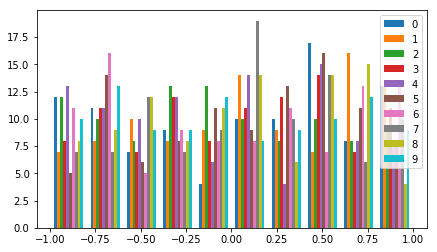

In [3]:
## Question
train = pd.read_csv('./P1b_training_data',skiprows=0, header=None)
#print(train.head)

X_train = train.values[:,0:-1]
y_train = train.values[:,-1]
print(X_train.shape)
print(y_train.shape)

N = len(X_train)
d = X_train.shape[1] 

mu = np.average(X_train)
var = np.var(X_train)
sig = np.sqrt(var)

plt.figure
plt.hist(X_train)
plt.legend(range(d))

### Problem Statement



P1. This gives 10-dimensional data that is linearly separable. There are two cases: one in which it is ensured that all data is a minimum distance away from the separating hyperplane and the second case where this is not done. <br/>
You have to learn a separating hyperplane using Perceptron, LMS algorithm and using the standard formula (that uses generalized inverse). In each case vary training set sizes and any other parameters that you think should be varied (e.g., step-size in LMS, starting point in Perceptron). In all cases find accuracies on test set. What you need to submit, as earlier, is a summary of your results and a discussion of the results. 

## Perceptron

vary starting point

0 1.0
(101, 11)
0.940594059406


Text(0.5,0,'epochs')

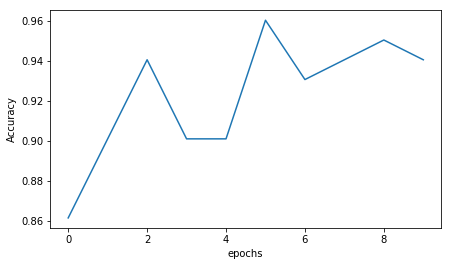

In [6]:
## Augmented initial Weight vector
#np.random.seed(1)
W = np.random.randn(d + 1)
#print(W.shape)

## generating -1 dataset and augmented dataset
print(np.argmin(y_train), y_train[1])


X_aug = np.column_stack( (X_train, np.ones(shape=(N,)) ))
X_ = X_aug * y_train[:,np.newaxis]

print(X_.shape)
acc = []
## Perceptron Algorithm
for epoch in range(10):
    count = 0
    for i in range(N):
        if(W.dot(X_[i,]) <= 0):
            W += X_[i,]
            count += 1
    #print(count)
            #W = W / np.linalg.norm(W,2)
    acc.append(perceptron_accuracy(X_train, N, y_train, W))
print(acc[-1])
plt.plot(acc)
plt.ylabel('Accuracy')
plt.xlabel('epochs')

##### Checking classifier with training dataset

In [7]:
def perceptron_accuracy(X, N, y, W):
    X = np.column_stack( (X, np.ones(shape=(N,)) ))

    # Calculating accuracy
    y_mask = X.dot(W[:,np.newaxis]) > 0     
    y_ = y > 0
    
    return(np.sum(y_ == y_mask.squeeze()) /N) 
    #print('accuracy = {:.3f}'.format(np.sum(y_ == y_mask.squeeze()) /N_test ))

perceptron_accuracy(X_train, N, y_train, W)

0.94059405940594054

##### Accuracy Perceptron Algorithm on test dataset

In [8]:
perceptron_accuracy(X_test, N_test, y_test, W)

0.88118811881188119

## LMS algorithm

vary step size

0.960396039604


Text(0.5,0,'epochs')

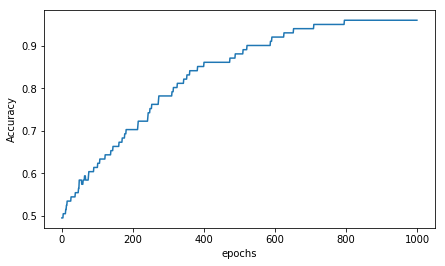

In [11]:
# initializes weight
W = np.random.randn(d + 1, 1)
#print(W.shape)
lr = 1e-4

X_ = np.column_stack( (X_train, np.ones(shape=(N,)) ))
#print(X_.shape)
acc = []
for epoch in range(1000):
    for i in range(N):
        x = X_[i,:][:,np.newaxis].T
        #x = x[:,np.newaxis].T
        er = x.dot(W) - y_train[i]
        W = W - lr*(x.T.dot(er))
    acc.append(lms_accuracy(X_train, y_train, W))
    
print(acc[-1])
plt.plot(acc)
plt.ylabel('Accuracy')
plt.xlabel('epochs')

In [12]:
def lms_accuracy(X, y , W):
    N = X.shape[0]
    X = np.column_stack( (X, np.ones(shape=(N,)) ))
    
    # Calculating accuracy
    y_mask = X.dot(W) > 0     
    y_ = y > 0
    
    return(np.sum(y_ == y_mask.squeeze()) /N) 
    #print('accuracy = {:.3f}'.format(np.sum(y_ == y_mask.squeeze()) /N))
    

In [13]:
print('test accuracy {:.3f}'.format(lms_accuracy(X_test, y_test, W)))

test accuracy 0.950


## Generalized Inverse

In all find accuracies

In [14]:
X_ = np.column_stack( (X_train, np.ones(shape=(N,)) ))

# inverse
Xinv = np.linalg.inv(X_.T.dot(X_))
#print(Xinv.shape)

W = Xinv.dot(X_.T.dot(y_train))

print("accuracy {:.3f}".format(lms_accuracy(X_train, y_train, W)))

accuracy 0.970


In [15]:
print("test accuracy {:.3f}".format(lms_accuracy(X_test, y_test, W)))

test accuracy 0.901


<hr>

# Testing

(101, 10)
(101,)


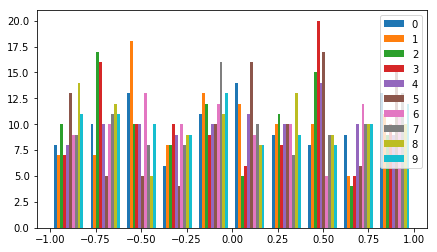

In [16]:
## Question
test = pd.read_csv('./P1b_test_data',skiprows=0, header=None)
#print(train.head)

X_test = test.values[:,0:-1]
y_test = test.values[:,-1]
print(X_test.shape)
print(y_test.shape)

N_test = len(X_test)
d = X_test.shape[1] 

mu = np.average(X_test)
var = np.var(X_test)
sig = np.sqrt(var)

plt.figure
plt.hist(X_test)
plt.legend(range(d))

<hr>

# Sklearn Code

In [17]:
import sklearn.linear_model as lm

### Perceptron

In [18]:
model = lm.Perceptron(max_iter = 1000, tol = None)

model.fit(X_train, y_train)

print('accuracy {:.3f}'.format(model.score(X_test, y_test)))

accuracy 0.970


## LMS algorithm 
(stochastic gradient descent on 1 batch size with mean square loss)

In [19]:
model = lm.SGDClassifier(loss='squared_loss', max_iter=2000, tol=None, learning_rate='constant', eta0=1e-3)

model.fit(X_train, y_train)

print('accuracy {:.3f}'.format(model.score(X_test, y_test)))

accuracy 0.901
